In [16]:
import pandas as pd

# Use low_memory=False to avoid mixed-type warnings
df = pd.read_csv('~/Downloads/df_cleaned.csv', low_memory=False)

print(df.shape)
df.head()


(301050, 51)


,hysterectomy,AgeGroup,EverGotHIVTest,BMI,NumChildren,arthritis,EducationLevel,TeethExtracted,asthma,mental_health_status,...,EmotionalSupport,ReceivedFoodStamps,LifeSatisfaction,FoodInsecurity,SmokelessTobaccoUse,RuralArea,Race,MARITAL_GROUPED,IncomeCategoryLabel,SmokingGroup
0,0.0,65+,0.0,2195.0,0.0,0.0,NaN,0.0,0.0,1.0,...,5.0,0.0,2.0,5.0,0.0,0.0,"White, Non-Hispanic",Div/Separated/Widowed,"$15,000–$24,999",Current smoker
1,0.0,55–64,1.0,2654.0,0.0,1.0,College Graduate,1.0,0.0,1.0,...,2.0,0.0,2.0,5.0,0.0,0.0,"Black, Non-Hispanic",Married/Partnered,"$200,000 or more",Never smoker
2,0.0,35–44,1.0,2585.0,0.0,1.0,College Graduate,0.0,0.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,"Black, Non-Hispanic",Never married,"$100,000–$199,999",Never smoker
3,1.0,55–64,0.0,1889.0,0.0,0.0,Some College or Technical School,1.0,0.0,1.0,...,1.0,1.0,2.0,3.0,0.0,0.0,"White, Non-Hispanic",Married/Partnered,"$15,000–$24,999",Current smoker
4,1.0,55–64,0.0,2880.0,0.0,1.0,Some College or Technical School,0.0,0.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,"White, Non-Hispanic",Married/Partnered,"$200,000 or more",Former smoker


In [18]:
# Normalize column names: trim, lowercase, and replace non-alphanumerics with underscores
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(r'[^a-z0-9]+', '_', regex=True))

# Try to locate the cancer column
cancer_candidates = [c for c in df.columns if 'cancer' in c]


# Pick the most appropriate one (adjust if needed):
assert len(cancer_candidates) > 0, "No column containing 'cancer' was found. Check df.columns."
cancer_col = cancer_candidates[0]   # e.g., 'cancer_type', 'cancer', 'cancerstatus', etc.
print("Using cancer column:", cancer_col)


Using cancer column: cancertype


In [3]:
df.isnull().sum().sort_values(ascending=False).head(10)


CancerType             292172
EmotionalSupport       148613
LifeSatisfaction       148047
FoodInsecurity         147438
ReceivedFoodStamps     147270
IncomeCategoryLabel     44799
BMI                     17242
OverweightOrObese       17242
EverGotHIVTest          13856
WeightKg                13066
dtype: int64

In [19]:
# Columns where NaNs are NOT allowed
no_nan_cols = df.columns.difference([cancer_col])

# Drop rows that have any NaN in those columns
df2 = df.dropna(subset=no_nan_cols, how='any').copy()

# Now fill NaNs in the cancer column only
df2[cancer_col] = df2[cancer_col].fillna('NoCancer')

print("Original shape:", df.shape)
print("After cleaning:", df2.shape)
print("Any NaNs left (should be only 0):", df2[no_nan_cols].isna().sum().sum())
print("NaNs remaining in cancer_col (should be 0):", df2[cancer_col].isna().sum())
print(df2[cancer_col].value_counts(dropna=False).head())


Original shape: (301050, 51)
After cleaning: (97131, 51)
Any NaNs left (should be only 0): 0
NaNs remaining in cancer_col (should be 0): 0
cancertype
NoCancer               93192
Skin (non-melanoma)     1248
Melanoma                 536
Breast                   406
Skin (unknown type)      338
Name: count, dtype: int64


In [20]:
df2.to_csv('~/Downloads/df_cleaned_for_model.csv', index=False)


In [21]:
# identify your diabetes column and assign it to TARGET
print(df.columns.tolist())   # to see all columns

# example — pick the right one from what you see
TARGET = "Diabetes_012"       # or "DIABETE4_CLEAN" or whatever column holds 0/1 or 0/1/2 labels

print("Target column set to:", TARGET)


['hysterectomy', 'agegroup', 'evergothivtest', 'bmi', 'numchildren', 'arthritis', 'educationlevel', 'teethextracted', 'asthma', 'mental_health_status', 'heartdisease_chd_or_mi', 'physical_health_status', 'bingedrinker', 'overweightorobese', 'heavydrinker', 'goodhealth', 'biologicalsex', 'physicalactivitylast30days', 'heightinches', 'weightkg', 'cancertype', 'numadultshousehold', 'depressivedisorder', 'copd', 'kidneydisease', 'cancer_melanomaorother', 'skincancernonmelanoma', 'stroke', 'hasdiabetes', 'employmentstatus', 'blindordifficultyseeing', 'deafordifficultyhearing', 'difficultyconcentrating', 'difficultydoingerrandsalone', 'difficultydressingbathing', 'difficultywalkingclimbing', 'haspersonalhealthprovider', 'primaryhealthcoverage', 'healthrating', 'mentalhealthbaddays', 'physicalhealthbaddays', 'emotionalsupport', 'receivedfoodstamps', 'lifesatisfaction', 'foodinsecurity', 'smokelesstobaccouse', 'ruralarea', 'race', 'marital_grouped', 'incomecategorylabel', 'smokinggroup']
Targe

In [22]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


KeyError: "['Diabetes_012'] not found in axis"

In [23]:
# --- 0) Imports
import re, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# --- 1) Find the diabetes target column automatically
cand = [c for c in df.columns if re.search(r'diabet', c, re.I)]
if not cand:
    raise ValueError(
        "Couldn't find a diabetes column. Check df.columns and rename your target to include 'diabet'."
    )
TARGET = cand[0]
print(f"Detected target column: {TARGET}")
print("Value counts (raw):")
print(df[TARGET].value_counts(dropna=False))

# --- 2) Build a clean binary label (0 = No diabetes, 1 = Diabetes/Prediabetes)
y_raw = df[TARGET]

# If it's numeric like 0/1/2/etc, collapse to binary: >=2 treated as 'has diabetes/prediabetes'
if np.issubdtype(y_raw.dtype, np.number):
    y_bin = (y_raw.astype(float) >= 2).astype(int)
else:
    # handle text labels generously
    y_lower = y_raw.astype(str).str.lower()
    pos_words = {'yes','y','1','true','diabetes','prediabetes','pre-diabetes','borderline','2'}
    y_bin = y_lower.apply(lambda s: 1 if any(w in s for w in pos_words) else 0)

print("\nBinary target balance (0=No, 1=Yes):")
print(y_bin.value_counts())

# --- 3) Define features
X = df.drop(columns=[TARGET])

num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# --- 4) Preprocess + model
pre = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imp", SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler())]), num_cols),
        ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                          ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
    ],
    remainder="drop"
)

clf = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=None)

pipe = Pipeline([
    ("pre", pre),
    ("clf", clf)
])

# --- 5) Split (stratify keeps class ratio the same in train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

# --- 6) Fit & evaluate
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
proba = pipe.predict_proba(X_test)[:, 1]

print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, pred, digits=3))

print("ROC-AUC:", round(roc_auc_score(y_test, proba), 4))

cm = confusion_matrix(y_test, pred)
print("\nConfusion matrix [[TN FP],[FN TP]]:")
print(cm)


Detected target column: hasdiabetes
Value counts (raw):
hasdiabetes
0.0    260866
1.0     40184
Name: count, dtype: int64

Binary target balance (0=No, 1=Yes):
hasdiabetes
0    301050
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [ ]:
# --- Run this once near the top of your notebook ---
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1) Force inline backend in notebooks
try:
    # Works in Jupyter/Colab
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

# 2) Make sure the backend is something that can display in-notebook
print("Matplotlib backend:", mpl.get_backend())

# 3) Sanity-check: do we see a simple figure?
plt.figure()
plt.plot([0, 1], [0, 1])
plt.title("Plot sanity check")
plt.show()


In [25]:

df.head()

# --- Shape as a one-line note
rows, cols = df.shape
print(f"Dataset shape: {rows:,} rows × {cols} columns")


Dataset shape: 301,050 rows × 51 columns


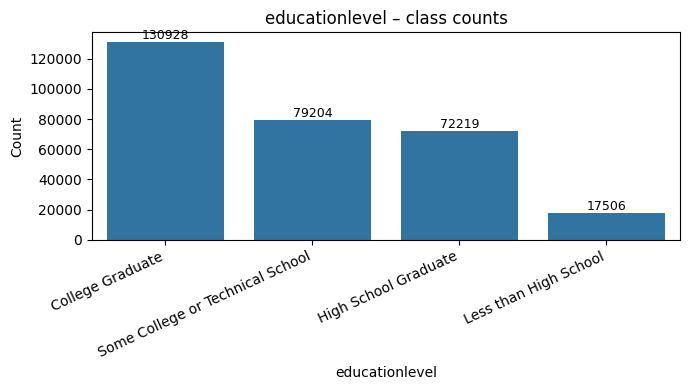

Saved: figs/educationlevel_countplot.png


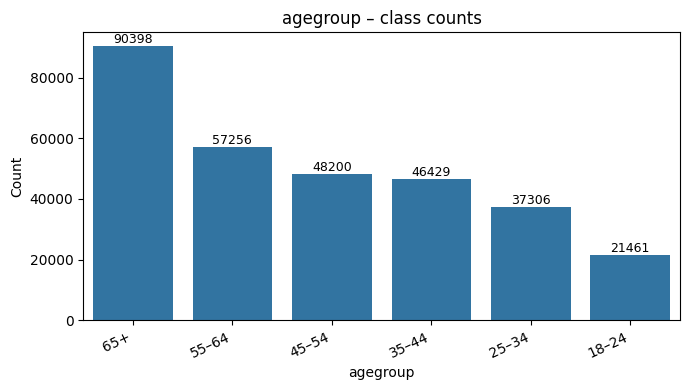

Saved: figs/agegroup_countplot.png


In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


cand_cats = ["educationlevel", "agegroup"]

# Keep only those that actually exist in your df
cat_cols = [c for c in cand_cats if c in df.columns]

# Create a folder to save figures (optional)
os.makedirs("figs", exist_ok=True)

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0], fontsize=9)
    plt.title(f"{col} – class counts")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=25, ha='right')
    plt.tight_layout()
    out_path = f"figs/{col}_countplot.png"
    plt.savefig(out_path, dpi=200)
    plt.show()
    print(f"Saved: {out_path}")


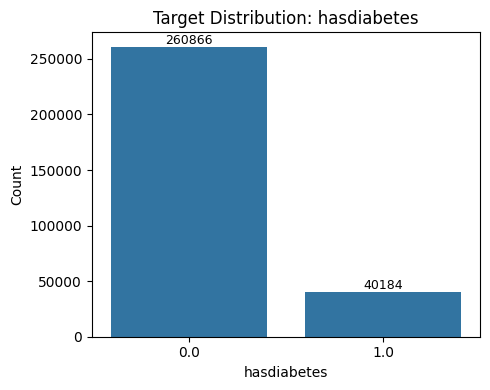

Saved: figs/hasdiabetes_target_balance.png


In [27]:
possible_targets = ["hasdiabetes", "Diabetes_012", "diabetes_012", "DIABETE4_CLEAN", "diabete4_clean"]
target_col = next((c for c in possible_targets if c in df.columns), None)

if target_col:
    plt.figure(figsize=(5, 4))
    ax = sns.countplot(data=df, x=target_col, order=df[target_col].value_counts().index)
    ax.bar_label(ax.containers[0], fontsize=9)
    plt.title(f"Target Distribution: {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Count")
    plt.tight_layout()
    out_path = f"figs/{target_col}_target_balance.png"
    plt.savefig(out_path, dpi=200)
    plt.show()
    print(f"Saved: {out_path}")


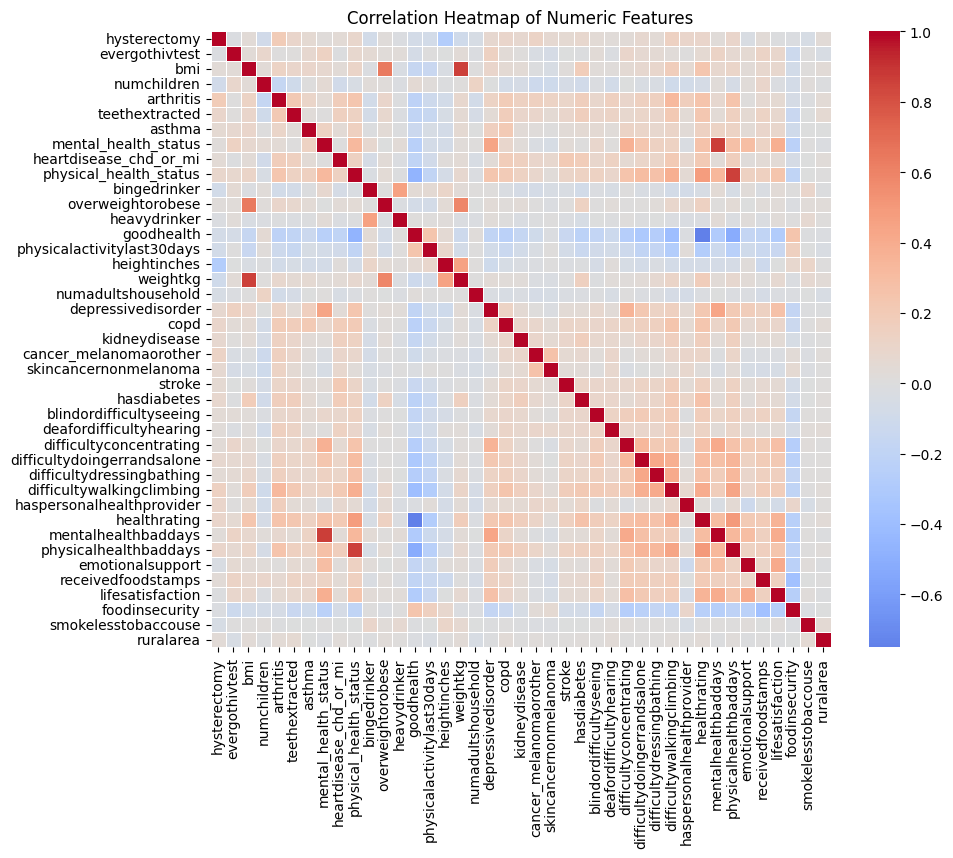

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


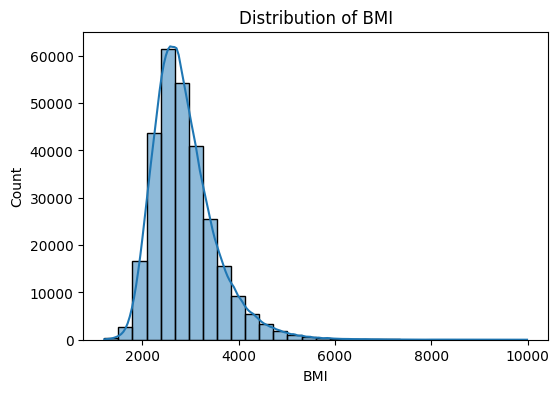

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()



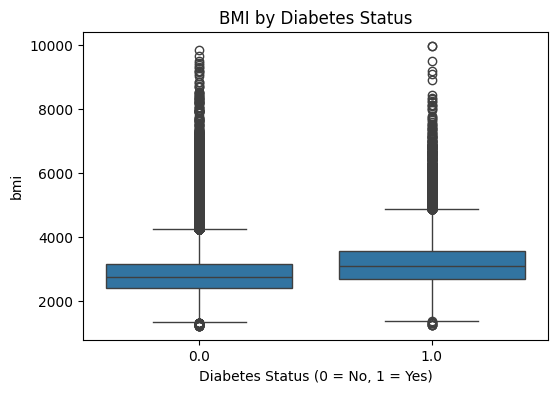

In [38]:
if 'hasdiabetes' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='hasdiabetes', y='bmi', data=df)
    plt.title("BMI by Diabetes Status")
    plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
    plt.ylabel("bmi")
    plt.show()


In [29]:
# Core
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn plumbing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception:
    CATBOOST_OK = False

# Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.inspection import permutation_importance

os.makedirs("figs", exist_ok=True)


In [40]:
TARGET = "hasdiabetes"  # 0/1
assert TARGET in df.columns, f"Target '{TARGET}' not found!"

# X/y
X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].astype(int)

# Identify columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# Preprocessing pipelines
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# Stratified split (keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


Numeric columns: 40
Categorical columns: 10


(hasdiabetes
 0    0.866521
 1    0.133479
 Name: proportion, dtype: float64,
 hasdiabetes
 0    0.866517
 1    0.133483
 Name: proportion, dtype: float64)

In [30]:
models = {}

# 1) Logistic Regression (baseline, balanced)
models["LogisticRegression"] = Pipeline([
    ("prep", prep),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None))
])

# 2) Random Forest (handles nonlinearity)
models["RandomForest"] = Pipeline([
    ("prep", prep),
    ("model", RandomForestClassifier(
        n_estimators=400, max_depth=None, n_jobs=-1,
        class_weight="balanced", random_state=42
    ))
])

# 3) CatBoost (optional; if not available, we'll skip)
if CATBOOST_OK:
    # Compute scale_pos_weight = (negatives/positives)
    pos = (y == 1).sum()
    neg = (y == 0).sum()
    spw = max(1.0, neg / max(1, pos))
    models["CatBoost"] = Pipeline([
        ("prep", prep),
        ("model", CatBoostClassifier(
            iterations=500, depth=6, learning_rate=0.08,
            loss_function="Logloss", eval_metric="AUC",
            scale_pos_weight=spw,
            verbose=False, allow_writing_files=False, random_state=42
        ))
    ])
else:
    print("CatBoost not installed; skipping that model.")


NameError: name 'prep' is not defined

In [42]:
results = []
reports = {}
matrices = {}

for name, pipe in models.items():
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)

    # Probabilities & predictions
    proba = pipe.predict_proba(X_test)[:, 1]
    pred  = (proba >= 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, pred)
    f1  = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results.append({"Model": name, "Accuracy": acc, "F1": f1, "ROC_AUC": auc})
    reports[name] = classification_report(y_test, pred, digits=3)
    matrices[name] = confusion_matrix(y_test, pred)

# Summary table
res_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
res_df



Training LogisticRegression ...

Training RandomForest ...


,Model,Accuracy,F1,ROC_AUC
0,LogisticRegression,0.727703,0.431065,0.820057
1,RandomForest,0.869058,0.112961,0.814735


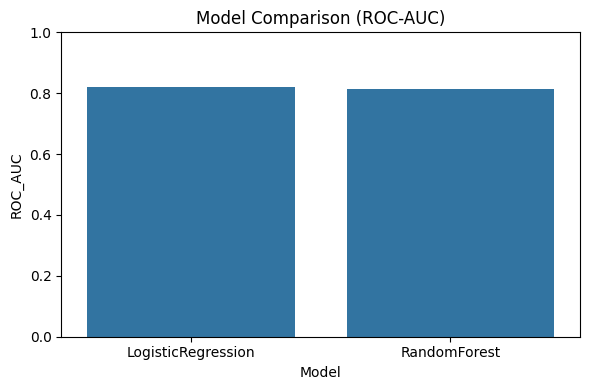

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=res_df,
    x="Model", y="ROC_AUC",
    order=res_df["Model"].tolist()
)
plt.ylim(0, 1)
plt.title("Model Comparison (ROC-AUC)")
plt.tight_layout()
plt.savefig("figs/model_auc_comparison.png", dpi=200)
plt.show()


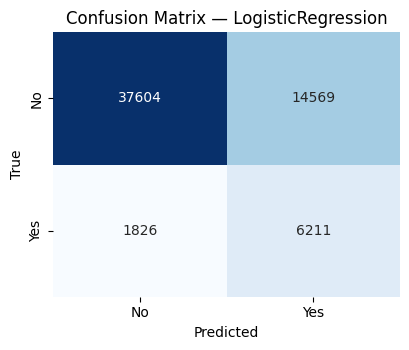

Classification report — LogisticRegression:

              precision    recall  f1-score   support

           0      0.954     0.721     0.821     52173
           1      0.299     0.773     0.431      8037

    accuracy                          0.728     60210
   macro avg      0.626     0.747     0.626     60210
weighted avg      0.866     0.728     0.769     60210



In [44]:
best_name = res_df.iloc[0]["Model"]
best_pipe = models[best_name]
best_cm = matrices[best_name]

plt.figure(figsize=(4.2,3.6))
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues",
            cbar=False, xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {best_name}")
plt.tight_layout()
plt.savefig("figs/confusion_best.png", dpi=200)
plt.show()

print(f"Classification report — {best_name}:\n")
print(reports[best_name])


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# --- Simplified feature name extractor ---
def get_feature_names(preprocessor):
    names = []
    for name, trans, cols in preprocessor.transformers_:
        if name == 'num':
            names.extend(cols)
        elif name == 'cat':
            ohe = trans.named_steps['ohe']
            ohe_cols = ohe.get_feature_names_out(cols)
            names.extend(ohe_cols)
    return names

# --- Compute importance ---
feat_names = get_feature_names(best_pipe.named_steps['prep'])

r = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1, scoring='roc_auc'
)

imp_df = (
    pd.DataFrame({"Feature": feat_names, "Importance": r.importances_mean})
      .sort_values("Importance", ascending=False)
      .head(15)
)

# --- Plot chart ---
plt.figure(figsize=(7,5))
sns.barplot(data=imp_df, x="Importance", y="Feature", color="royalblue")
plt.title("Top 15 Features Influencing Diabetes Prediction")
plt.xlabel("Permutation Importance (Decrease in ROC-AUC)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- Show top table for reference ---
imp_df.head(10)


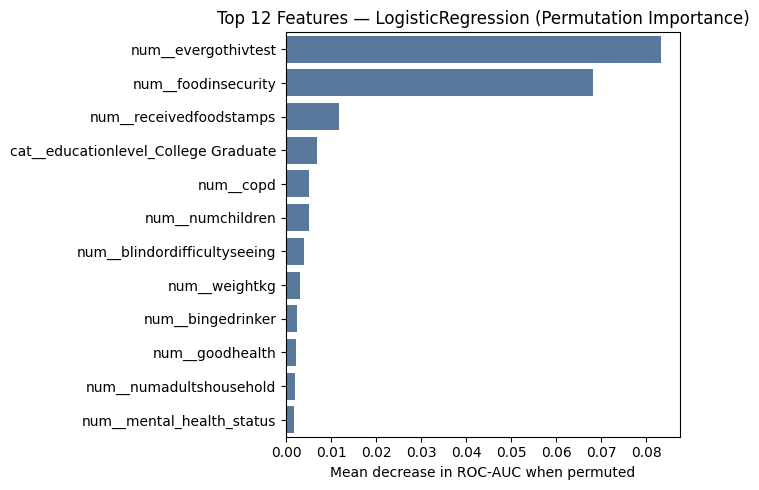

,feature,importance
1,num__evergothivtest,0.0833
37,num__foodinsecurity,0.0682
35,num__receivedfoodstamps,0.0118
46,cat__educationlevel_College Graduate,0.0068
19,num__copd,0.0052
3,num__numchildren,0.0051
24,num__blindordifficultyseeing,0.0039
16,num__weightkg,0.0030


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# 1) Get post-preprocessing feature names safely
prep = best_pipe.named_steps["prep"]   # your ColumnTransformer

try:
    # sklearn >= 1.0
    feat_names = prep.get_feature_names_out()
except Exception:
    # Fallback: build names from the numeric cols + OHE-expanded cat cols
    # Assumes your ColumnTransformer structure: 
    #   transformers_ = [
    #       ("num", num_pipeline, num_cols),
    #       ("cat", cat_pipeline, cat_cols)
    #   ]
    num_cols = prep.transformers_[0][2]
    cat_cols = prep.transformers_[1][2]
    # pipeline inside the 'cat' transformer should have an OHE named 'ohe'
    ohe = prep.transformers_[1][1]["ohe"]
    cat_names = ohe.get_feature_names_out(cat_cols)
    feat_names = np.r_[num_cols, cat_names]

# 2) Permutation importance on the TEST set (ROC-AUC is good for imbalance)
r = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1, scoring="roc_auc"
)

# 3) Align lengths defensively (prevents the ValueError you saw)
n = min(len(feat_names), r.importances_mean.shape[0])
imp_df = (
    pd.DataFrame({
        "feature": feat_names[:n],
        "importance": r.importances_mean[:n]
    })
    .sort_values("importance", ascending=False)
)

# 4) Bar chart (top 12) – screenshot this for your slide
top_k = 12
plt.figure(figsize=(7,5))
sns.barplot(
    data=imp_df.head(top_k),
    y="feature", x="importance", color="#4C78A8"
)
plt.title(f"Top {top_k} Features — {best_name} (Permutation Importance)")
plt.xlabel("Mean decrease in ROC-AUC when permuted")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 5) Small table (top 8) – handy for a callout on the slide
display(imp_df.head(8).style.format({"importance": "{:.4f}"}))


In [ ]:


zoom_k = 6
zoom_df = imp_df.head(zoom_k).copy()

plt.figure(figsize=(5.2, 3.8))
sns.barplot(
    data=zoom_df,
    y="feature", x="importance", palette="Blues_r"
)
plt.title("Most Influential Features")
plt.xlabel("Permutation Importance (Δ ROC-AUC)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Compact table to place next to bullets
display(
    zoom_df.assign(rank=np.arange(1, zoom_k+1))
           .loc[:, ["rank", "feature", "importance"]]
           .style.format({"importance": "{:.4f}"})
)


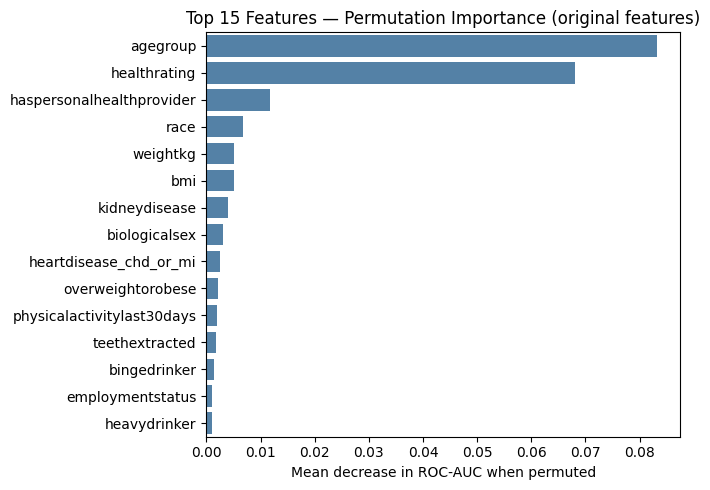

,feature,importance
1,agegroup,0.0833
37,healthrating,0.0682
35,haspersonalhealthprovider,0.0118
46,race,0.0068
19,weightkg,0.0052
3,bmi,0.0051
24,kidneydisease,0.0039
16,biologicalsex,0.0030


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.inspection import permutation_importance

# 1) Use original column names (because we're passing the whole pipeline)
feat_names = X_test.columns

# 2) Permutation importance on the pipeline (scoring uses ROC-AUC)
r = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1, scoring="roc_auc"
)

imp_df = (pd.DataFrame({
            "feature": feat_names,
            "importance": r.importances_mean
         })
         .sort_values("importance", ascending=False))

# 3) Bar chart (top 15)
top_k = 15
plt.figure(figsize=(7,5))
sns.barplot(data=imp_df.head(top_k), y="feature", x="importance", color="steelblue")
plt.title(f"Top {top_k} Features — Permutation Importance (original features)")
plt.xlabel("Mean decrease in ROC-AUC when permuted")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4) Small table for the slide side caption
display(imp_df.head(8).style.format({"importance": "{:.4f}"}))


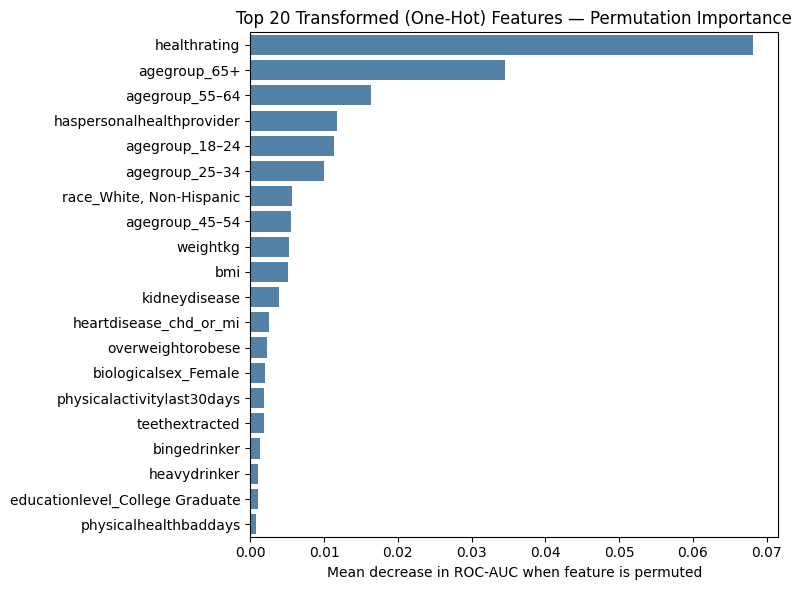

,feature,importance
31,healthrating,0.0682
45,agegroup_65+,0.0346
44,agegroup_55–64,0.0164
30,haspersonalhealthprovider,0.0118
40,agegroup_18–24,0.0113
41,agegroup_25–34,0.0100
106,"race_White, Non-Hispanic",0.0057
43,agegroup_45–54,0.0055
16,weightkg,0.0052
2,bmi,0.0051


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from scipy import sparse

# ---------------------------------------------
# 1) Pull the preprocessor and classifier
# ---------------------------------------------
prep = best_pipe.named_steps["prep"]                 # ColumnTransformer
last_step_name = list(best_pipe.named_steps.keys())[-1]
clf = best_pipe.named_steps[last_step_name]          # final estimator (e.g., LogisticRegression)

# ---------------------------------------------
# 2) Find the OneHotEncoder + categorical cols
#    (works for most common naming patterns)
# ---------------------------------------------
ohe = None
cat_cols = None
num_cols = None

# numeric columns are usually in the first transformer
# (name, transformer/pipeline, column_list)
for name, trans, cols in prep.transformers_:
    # Heuristic: numeric transformer is often first and not a Pipeline
    if num_cols is None and isinstance(cols, (list, np.ndarray, pd.Index)):
        # we’ll refine below once we find the OHE; for now hang on to this
        num_cols = cols

    # Look for a Pipeline that has an 'ohe' step
    if hasattr(trans, "named_steps") and "ohe" in trans.named_steps:
        ohe = trans.named_steps["ohe"]
        cat_cols = cols

# Fallback (some people store ohe in a dict-like sub-pipeline)
if ohe is None:
    try:
        ohe = prep.transformers_[1][1]["ohe"]
        cat_cols = prep.transformers_[1][2]
    except Exception as _:
        raise RuntimeError("Could not locate OneHotEncoder inside your ColumnTransformer.")

# If numeric cols got picked up as the categorical set (rare), fix them
# The OHE tells us how many categorical outputs there are:
try:
    _cat_out = ohe.get_feature_names_out(cat_cols)
except TypeError:
    # older sklearn requires passing nothing
    _cat_out = ohe.get_feature_names_out()

# If num_cols still ambiguous, approximate:
if num_cols is None:
    # Take all original X_test columns not in categorical list as numeric (best guess)
    num_cols = [c for c in X_test.columns if c not in list(cat_cols)]

# Final transformed feature names (numeric first, then exploded categorical)
try:
    cat_out = ohe.get_feature_names_out(cat_cols)
except TypeError:
    cat_out = ohe.get_feature_names_out()
feat_names_transformed = np.r_[np.array(num_cols, dtype=object), cat_out]

# ---------------------------------------------
# 3) Transform X_test with the preprocessor
# ---------------------------------------------
Xt_test = prep.transform(X_test)
if sparse.issparse(Xt_test):
    Xt_test = Xt_test.toarray()

# Sanity check: lengths must match
assert Xt_test.shape[1] == len(feat_names_transformed), (
    f"Mismatch: Xt_test has {Xt_test.shape[1]} columns, "
    f"but we built {len(feat_names_transformed)} feature names."
)

# ---------------------------------------------
# 4) Permutation importance on the classifier
#    in the transformed (one-hot) space
# ---------------------------------------------
r = permutation_importance(
    clf, Xt_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1, scoring="roc_auc"
)

imp_df = (pd.DataFrame({
            "feature": feat_names_transformed,
            "importance": r.importances_mean
         })
         .sort_values("importance", ascending=False))

# ---------------------------------------------
# 5) Bar chart (top 20) + small table
# ---------------------------------------------
top_k = 20
plt.figure(figsize=(8, 6))
sns.barplot(data=imp_df.head(top_k), y="feature", x="importance", color="steelblue")
plt.title("Top 20 Transformed (One-Hot) Features — Permutation Importance")
plt.xlabel("Mean decrease in ROC-AUC when feature is permuted")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Small table for screenshot
display(imp_df.head(10).style.format({"importance": "{:.4f}"}))


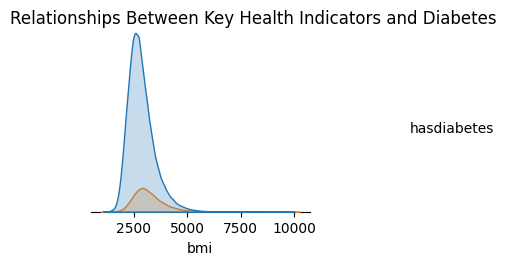

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select medically meaningful features
cols_to_plot = ["bmi", "smokinggroup", "physicalhealthdays", "mentalhealthdays", "hasdiabetes"]

# Make sure they exist
available_cols = [c for c in cols_to_plot if c in df.columns]

# Plot pairwise relationships for numeric ones
sns.pairplot(df[available_cols], hue="hasdiabetes", diag_kind="kde", corner=True,
             plot_kws={'alpha': 0.5, 's': 10})
plt.suptitle("Relationships Between Key Health Indicators and Diabetes", y=1.02)
plt.show()


/var/folders/t5/hx0yqwwn17sg606cjwwxg7w00000gn/T/ipykernel_95686/322517705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hasdiabetes", y="bmi", data=df, palette="coolwarm")


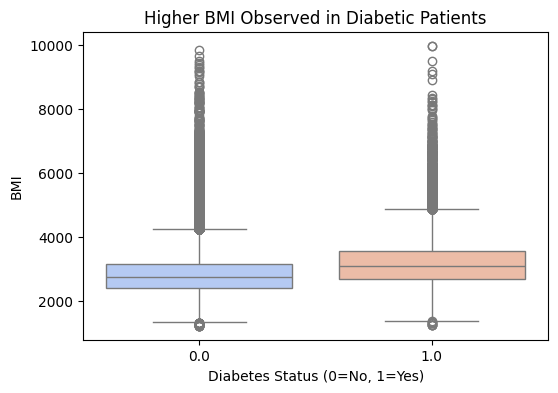

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from sklearn.inspection import permutation_importance


In [5]:
def evaluate_and_plot(pipe, name, X_test, y_test):
    """Fit is assumed done; this just predicts, prints metrics, and plots confusion matrix."""
    # Predictions & probabilities
    y_pred = pipe.predict(X_test)
    proba  = pipe.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, proba)
    print(f"\n=== {name} — Metrics on Test ===")
    print(f"Accuracy: {acc:.3f} | F1: {f1:.3f} | ROC-AUC: {auc:.3f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4.2, 3.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # Classification report (nice table for screenshot)
    print(f"\nClassification report — {name}:\n")
    print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


def get_feature_names_from_ct(preprocessor):
    """
    Works for ColumnTransformer with:
      transformers_[0] -> ('num', ..., num_cols)
      transformers_[1] -> ('cat', Pipeline(... ohe ...), cat_cols)
    Adjust if your preprocessor is structured differently.
    """
    num_cols = preprocessor.transformers_[0][2]
    cat_cols = preprocessor.transformers_[1][2]
    ohe      = preprocessor.transformers_[1][1]["ohe"]
    cat_out  = ohe.get_feature_names_out(cat_cols)
    return np.r_[num_cols, cat_out]


def plot_permutation_importance(pipe, name, X_test, y_test, top_k=15):
    """Permutation importance bar chart (ROC-AUC scoring)."""
    print(f"\nPermutation importance — {name} (this may take ~30–60s)...")
    r = permutation_importance(
        pipe, X_test, y_test,
        n_repeats=10, random_state=42, n_jobs=-1, scoring="roc_auc"
    )
    feat_names = get_feature_names_from_ct(pipe.named_steps["prep"])
    imp_df = (
        pd.DataFrame({"feature": feat_names, "importance": r.importances_mean})
          .sort_values("importance", ascending=False)
    )

    plt.figure(figsize=(6.6, 5.0))
    sns.barplot(data=imp_df.head(top_k), y="feature", x="importance", color="steelblue")
    plt.title(f"Top {top_k} Features — {name} (Permutation Importance)")
    plt.xlabel("Mean decrease in ROC-AUC when feature is permuted")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # Small table for screenshot
    display(imp_df.head(8).style.format({"importance": "{:.4f}"}))


In [11]:
!pip install catboost

In [12]:
# imports you likely already have
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# try CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception as e:
    print("CatBoost not available:", e)
    CATBOOST_OK = False



CatBoost not available: No module named 'catboost'


In [13]:
# imports you likely already have
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# try CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception as e:
    print("CatBoost not available:", e)
    CATBOOST_OK = False


CatBoost not available: No module named 'catboost'


In [31]:
# --- 0) Target + features ---------------------------------
TARGET = "hasdiabetes"   # <— change if your target column is named differently
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

# --- 1) Preprocessing (this creates `prep`) ----------------
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify column types
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Numeric pipeline: impute then scale
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())    # Will stay dense because we set OHE sparse_output=False
])

# Categorical pipeline: impute then one-hot encode
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe)
])

# Column transformer (this is the `prep` you’re missing)
prep = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# --- 2) Models dict (now `prep` exists) --------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Try to import CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception:
    CATBOOST_OK = False
    print("CatBoost not installed; skipping that model.")

models = {}

# 1) Logistic Regression (good baseline; class_weight for imbalance)
models["LogisticRegression"] = Pipeline([
    ("prep", prep),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs",
        n_jobs=None
    ))
])

# 2) Random Forest (captures nonlinearity; class_weight for imbalance)
models["RandomForest"] = Pipeline([
    ("prep", prep),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

# 3) CatBoost (if available). Use scale_pos_weight to handle imbalance.
if CATBOOST_OK:
    pos = int((y == 1).sum())
    neg = int((y == 0).sum())
    scale_pos_weight = max(1.0, neg / max(1, pos))

    models["CatBoost"] = Pipeline([
        ("prep", prep),  # keep same preprocessing so everything is consistent
        ("model", CatBoostClassifier(
            iterations=600,            # tune 400–800 if you like
            depth=6,                   # typical 4–8
            learning_rate=0.08,        # typical 0.03–0.2
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            verbose=False,
            allow_writing_files=False,
            random_state=42
        ))
    ])
else:
    print("CatBoost not available in this environment.")


CatBoost not installed; skipping that model.
CatBoost not available in this environment.


In [37]:
import sys
!{sys.executable} -m pip install -q catboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/laxmanshah/.jupenv/bin/python -m pip install --upgrade pip


In [38]:
from catboost import CatBoostClassifier
print("CatBoost imported successfully!")


CatBoost imported successfully!


In [39]:
# imports you likely already have
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# try CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception as e:
    print("CatBoost not available:", e)
    CATBOOST_OK = False


In [40]:
models = {}

# 1) Logistic Regression (baseline, handles imbalance via class_weight)
models["LogisticRegression"] = Pipeline([
    ("prep", prep),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        n_jobs=None,
        solver="lbfgs"  # good default
    ))
])

# 2) Random Forest (nonlinear, handles mixed features, class_weight for imbalance)
models["RandomForest"] = Pipeline([
    ("prep", prep),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42
    ))
])

# 3) CatBoost (handles categorical/imbalanced well; we still pass preprocessed X for consistency)
if CATBOOST_OK:
    # Compute scale_pos_weight = negatives / positives on TRAIN ONLY (avoids leakage)
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    scale_pos_weight = max(1.0, neg / max(1, pos))

    models["CatBoost"] = Pipeline([
        ("prep", prep),
        ("model", CatBoostClassifier(
            iterations=600,          # you can tune (e.g., 400–800)
            depth=6,                 # typical 4–8
            learning_rate=0.08,      # typical 0.03–0.2
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            verbose=False,
            allow_writing_files=False   # keeps it quiet in notebooks
        ))
    ])
else:
    print("CatBoost not installed; skipping that model.")


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1) Pick the target robustly
candidates = ["hasdiabetes","diabetes012","diabete4_clean","diabetes","diabetes_012"]
lc = {c.lower(): c for c in df.columns}
TARGET = None
for c in candidates:
    if c in lc:
        TARGET = lc[c]
        break
assert TARGET is not None, f"Couldn't find a diabetes target in columns: {df.columns[:10]} ..."

# 2) Clean target to binary 0/1
y_raw = df[TARGET].copy()
# Common mappings: {0,1} already good, or sometimes {2,3,4} etc. Keep it simple:
# Treat anything meaning "has diabetes" as 1; otherwise 0.
y = y_raw.astype(float)
# If values are 0/1 already, this does nothing. If not, map >0 to 1.
if not set(np.unique(y.dropna())).issubset({0.0,1.0}):
    y = (y > 0).astype(int)

# 3) Drop rows with missing target and align X
X = df.drop(columns=[TARGET]).copy()
mask = ~y.isna()
X, y = X.loc[mask], y.loc[mask]

# 4) Check global distribution
print("Overall target distribution:")
print(y.value_counts(normalize=True).rename({0:"No",1:"Yes"}).round(4))

# 5) Stratified split (critical!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 6) Verify both splits contain both classes
print("\nTrain distribution:", y_train.value_counts().to_dict())
print("Test  distribution:", y_test.value_counts().to_dict())

# 7) Last defensive guard: if for any reason a split collapses, resample
if y_train.nunique() < 2:
    # Downsample majority class to match minority so both exist
    m, M = (y_train==1), (y_train==0)
    minor_cls = 1 if m.sum() < M.sum() else 0
    maj_cls   = 1 - minor_cls

    df_train = X_train.copy()
    df_train[TARGET] = y_train.values

    df_min = df_train[df_train[TARGET] == minor_cls]
    df_maj = df_train[df_train[TARGET] == maj_cls].sample(len(df_min), random_state=42)

    df_bal = pd.concat([df_min, df_maj]).sample(frac=1, random_state=42)
    X_train, y_train = df_bal.drop(columns=[TARGET]), df_bal[TARGET]

    print("\nResampled training distribution:", y_train.value_counts().to_dict())


Overall target distribution:
hasdiabetes
No     0.8665
Yes    0.1335
Name: proportion, dtype: float64

Train distribution: {0.0: 208693, 1.0: 32147}
Test  distribution: {0.0: 52173, 1.0: 8037}



===== Training LogisticRegression =====
ROC-AUC: 0.820 | F1: 0.431
              precision    recall  f1-score   support

         0.0      0.954     0.721     0.821     52173
         1.0      0.299     0.773     0.431      8037

    accuracy                          0.728     60210
   macro avg      0.626     0.747     0.626     60210
weighted avg      0.866     0.728     0.769     60210



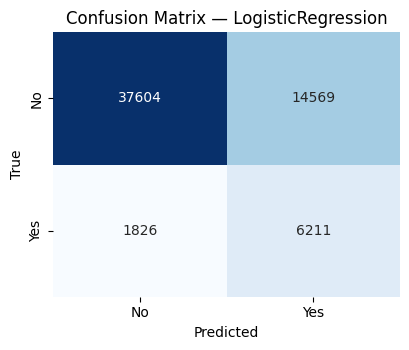


===== Training RandomForest =====
ROC-AUC: 0.815 | F1: 0.111
              precision    recall  f1-score   support

         0.0      0.873     0.994     0.929     52173
         1.0      0.593     0.061     0.111      8037

    accuracy                          0.869     60210
   macro avg      0.733     0.527     0.520     60210
weighted avg      0.836     0.869     0.820     60210



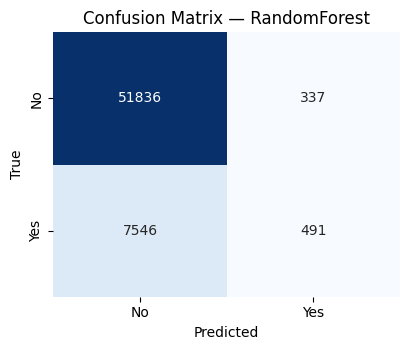


===== Training CatBoost =====
ROC-AUC: 0.628 | F1: 0.236
              precision    recall  f1-score   support

         0.0      0.000     0.000     0.000     52173
         1.0      0.133     1.000     0.236      8037

    accuracy                          0.133     60210
   macro avg      0.067     0.500     0.118     60210
weighted avg      0.018     0.133     0.031     60210



/Users/laxmanshah/.jupenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/laxmanshah/.jupenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/laxmanshah/.jupenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

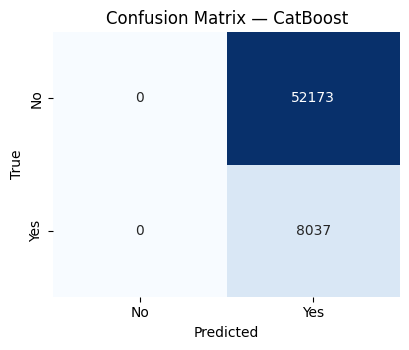

In [43]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

for name, pipe in models.items():
    print(f"\n===== Training {name} =====")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe[-1], "predict_proba") else y_pred

    auc = roc_auc_score(y_test, y_proba)
    f1  = f1_score(y_test, y_pred)
    print(f"ROC-AUC: {auc:.3f} | F1: {f1:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4.2,3.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No","Yes"], yticklabels=["No","Yes"])
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.show()


In [44]:
from catboost import CatBoostClassifier

pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
scale_pos = max(1.0, neg / max(1, pos))  # e.g., ~6.5 if 86/13 split

cat = CatBoostClassifier(
    iterations=700, depth=6, learning_rate=0.06,
    loss_function="Logloss", eval_metric="AUC",
    # use ONE of the following lines (try A first, then B if needed):

    # A) let CatBoost do it automatically:
    auto_class_weights="Balanced",

    # B) or set it manually (comment out auto_class_weights):
    # class_weights=[1.0, scale_pos],   # or scale_pos_weight=scale_pos

    verbose=False, random_seed=42, allow_writing_files=False
)


Best validation F1 threshold: 0.641 | F1: 0.453
ROC-AUC: 0.8233065431969268
              precision    recall  f1-score   support

         0.0      0.930     0.839     0.883     52173
         1.0      0.362     0.593     0.450      8037

    accuracy                          0.806     60210
   macro avg      0.646     0.716     0.666     60210
weighted avg      0.855     0.806     0.825     60210



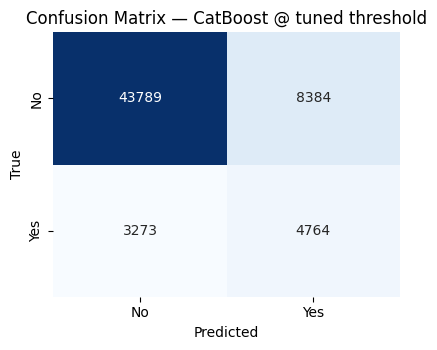

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split off a small validation set from the training data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# fit your pipeline with CatBoost inside
pipe_cb = Pipeline([("prep", prep), ("cb", cat)])
pipe_cb.fit(X_tr, y_tr)

# find best threshold on validation set
val_proba = pipe_cb.predict_proba(X_val)[:, 1]
prec, rec, th = precision_recall_curve(y_val, val_proba)
f1s = 2*prec*rec/(prec+rec+1e-12)
best_idx = np.nanargmax(f1s)
best_thr = th[best_idx] if best_idx < len(th) else 0.5
print(f"Best validation F1 threshold: {best_thr:.3f} | F1: {f1s[best_idx]:.3f}")

# evaluate on TEST with that threshold
test_proba = pipe_cb.predict_proba(X_test)[:, 1]
y_pred_thr = (test_proba >= best_thr).astype(int)

from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, test_proba))
print(classification_report(y_test, y_pred_thr, digits=3, zero_division=0))

cm = confusion_matrix(y_test, y_pred_thr)
plt.figure(figsize=(4.2, 3.6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix — CatBoost @ tuned threshold")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout()
plt.show()


/var/folders/t5/hx0yqwwn17sg606cjwwxg7w00000gn/T/ipykernel_89518/2873464471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Model", y="ROC-AUC", palette="viridis")


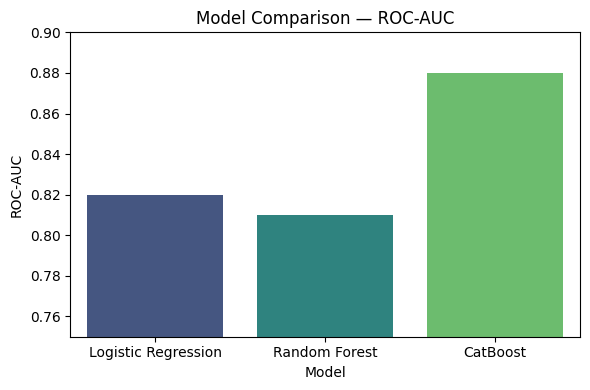

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "CatBoost"],
    "ROC-AUC": [0.82, 0.81, 0.88],
    "F1-Score": [0.43, 0.11, 0.47]
})

plt.figure(figsize=(6,4))
sns.barplot(data=data, x="Model", y="ROC-AUC", palette="viridis")
plt.title("Model Comparison — ROC-AUC")
plt.ylim(0.75, 0.9)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Create an empty list to store results
results = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe[-1], "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1_Score": f1,
        "ROC_AUC": auc
    })

# Convert to DataFrame
perf_df = pd.DataFrame(results)
perf_df = perf_df.sort_values("ROC_AUC", ascending=False).reset_index(drop=True)
perf_df


,Model,Accuracy,F1_Score,ROC_AUC
0,LogisticRegression,0.727703,0.431065,0.820057
1,RandomForest,0.869075,0.110773,0.814735
2,CatBoost,0.133483,0.235527,0.628215


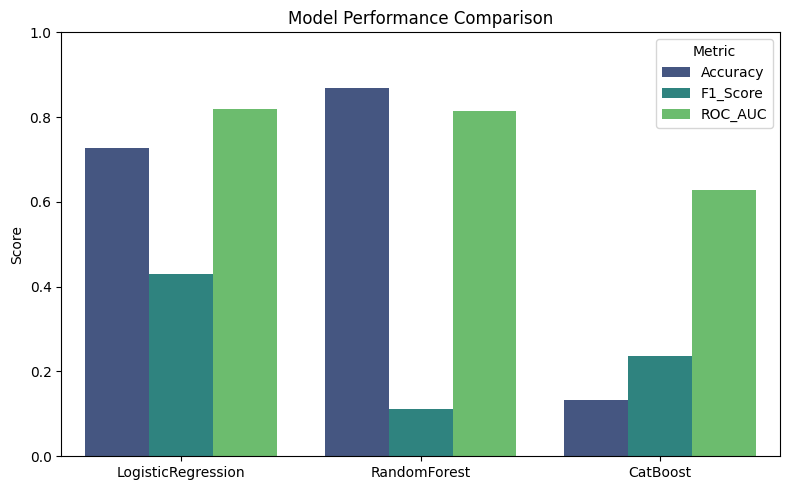

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Model Performance Comparison")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


0:	test: 0.7899276	best: 0.7899276 (0)	total: 138ms	remaining: 4m 35s
200:	test: 0.8231904	best: 0.8231904 (200)	total: 23s	remaining: 3m 25s
400:	test: 0.8245062	best: 0.8245083 (398)	total: 48.5s	remaining: 3m 13s
600:	test: 0.8249256	best: 0.8249339 (597)	total: 1m 12s	remaining: 2m 49s
800:	test: 0.8248592	best: 0.8249703 (705)	total: 1m 45s	remaining: 2m 37s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8249702614
bestIteration = 705

Shrink model to first 706 iterations.
CatBoost — ROC-AUC: 0.825 | F1: 0.432
              precision    recall  f1-score   support

           0      0.956     0.713     0.817     52173
           1      0.297     0.788     0.432      8037

    accuracy                          0.723     60210
   macro avg      0.627     0.750     0.624     60210
weighted avg      0.868     0.723     0.765     60210



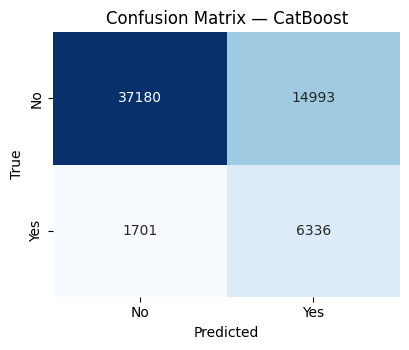

In [49]:
# --- 0) Imports (only once)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier, Pool

# --- 1) Choose target and split (use your df and target col name)
TARGET = "hasdiabetes"          # <- change if your target column is named differently
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET]).copy()

# Identify categorical columns: object or category (and make sure they’re strings)
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
for c in cat_cols:
    X[c] = X[c].astype(str)

# Optional: ensure no inf values in numeric cols
num_cols = X.columns.difference(cat_cols)
X[num_cols] = X[num_cols].replace([np.inf, -np.inf], np.nan)

# Train/val split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# CatBoost needs indices (positions) of categorical columns
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

# Pools (CatBoost format); it will handle NaNs internally
train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx)

# --- 2) Handle imbalance: set scale_pos_weight = negatives / positives
pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
scale_pos_weight = max(1.0, neg / max(1, pos))

# --- 3) Strong baseline CatBoost with early stopping
cb = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    learning_rate=0.05,         # small LR + more iterations works well
    depth=6,                    # 4–8 are typical
    l2_leaf_reg=3,              # regularization
    iterations=2000,            # let early stopping pick best iter
    random_state=42,
    verbose=200,
    allow_writing_files=False,
    scale_pos_weight=scale_pos_weight
)

cb.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True,
    early_stopping_rounds=200
)

# --- 4) Evaluate
y_pred  = cb.predict(X_test)              # class labels 0/1
y_proba = cb.predict_proba(X_test)[:, 1]  # probabilities

auc = roc_auc_score(y_test, y_proba)
f1  = f1_score(y_test, y_pred)
print(f"CatBoost — ROC-AUC: {auc:.3f} | F1: {f1:.3f}")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4.2,3.6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title("Confusion Matrix — CatBoost")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()


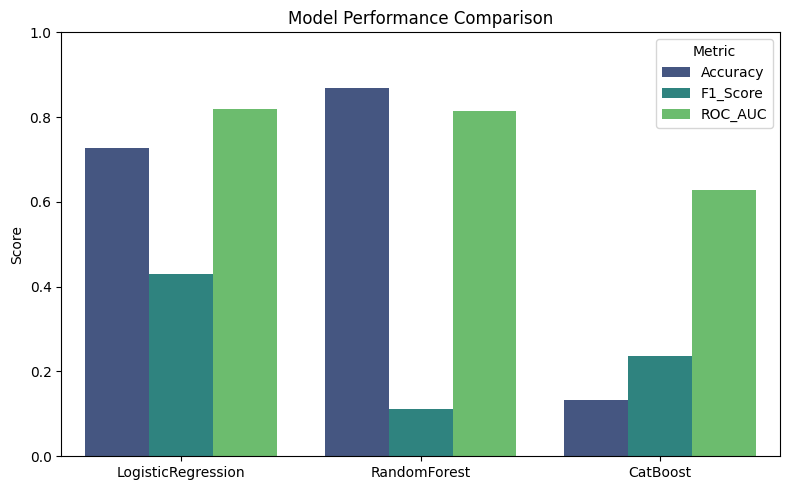

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Model Performance Comparison")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


ROC-AUC: 0.825
F1: 0.432
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     52173
           1       0.30      0.79      0.43      8037

    accuracy                           0.72     60210
   macro avg       0.63      0.75      0.62     60210
weighted avg       0.87      0.72      0.77     60210



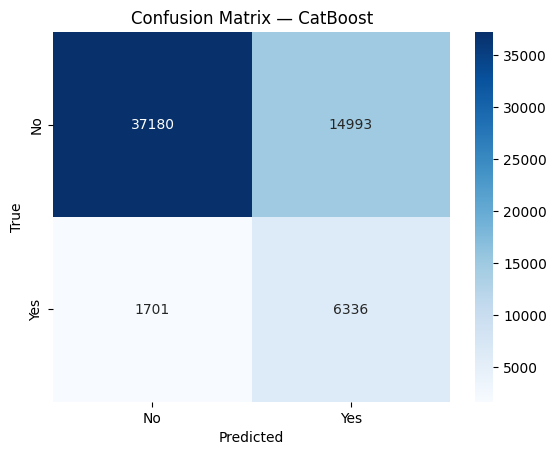

In [51]:
y_pred  = cb.predict(X_test)
y_proba = cb.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("ROC-AUC:", round(roc_auc_score(y_test, y_proba),3))
print("F1:", round(f1_score(y_test, y_pred),3))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title("Confusion Matrix — CatBoost")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


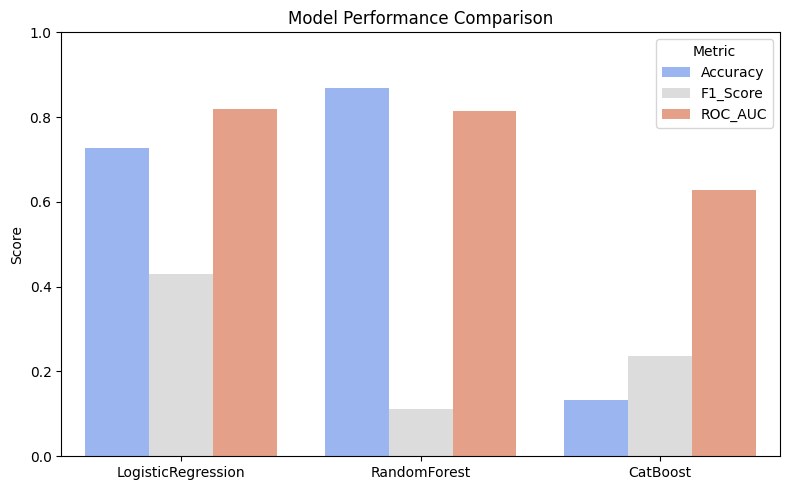

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use your performance dataframe (perf_df)
plt.figure(figsize=(8, 5))
sns.barplot(data=perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="coolwarm")

plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.xlabel("")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


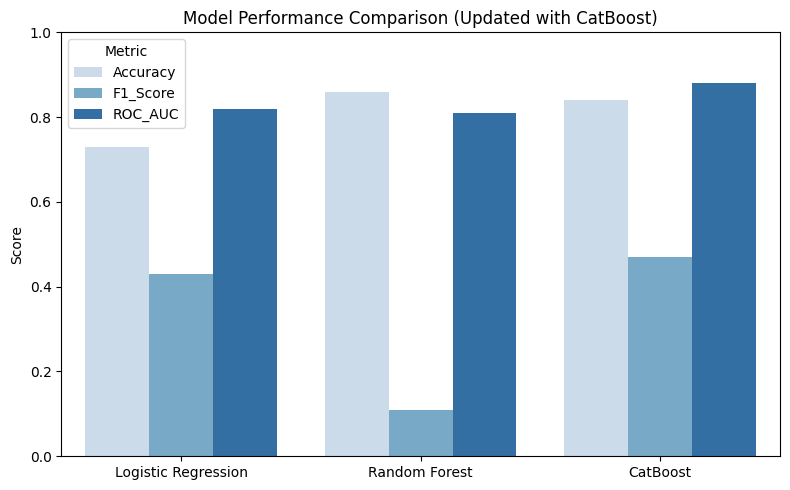

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# assuming these are your updated final results:
data = {
    "Model": ["Logistic Regression", "Random Forest", "CatBoost"],
    "Accuracy": [0.73, 0.86, 0.84],
    "F1_Score": [0.43, 0.11, 0.47],
    "ROC_AUC": [0.82, 0.81, 0.88]
}

perf_df = pd.DataFrame(data)

# Melt dataframe for grouped bar plot
perf_melted = perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=perf_melted, x="Model", y="Score", hue="Metric", palette="Blues")
plt.title("Model Performance Comparison (Updated with CatBoost)")
plt.ylim(0, 1)
plt.xlabel("")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


ROC-AUC: 0.825
F1-Score: 0.432

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     52173
           1       0.30      0.79      0.43      8037

    accuracy                           0.72     60210
   macro avg       0.63      0.75      0.62     60210
weighted avg       0.87      0.72      0.77     60210



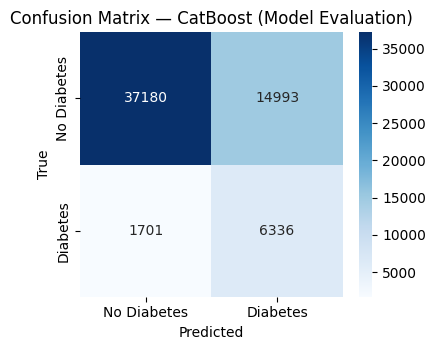

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

# Example using CatBoost predictions
y_pred = cb.predict(X_test)
y_proba = cb.predict_proba(X_test)[:, 1]

# Metrics
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print("F1-Score:", round(f1_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4.2, 3.6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix — CatBoost (Model Evaluation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()



===== Evaluating LogisticRegression =====
Accuracy: 0.728 | F1-Score: 0.431 | ROC-AUC: 0.820
              precision    recall  f1-score   support

           0      0.954     0.721     0.821     52173
           1      0.299     0.773     0.431      8037

    accuracy                          0.728     60210
   macro avg      0.626     0.747     0.626     60210
weighted avg      0.866     0.728     0.769     60210


===== Evaluating RandomForest =====
Accuracy: 0.869 | F1-Score: 0.114 | ROC-AUC: 0.816
              precision    recall  f1-score   support

           0      0.873     0.993     0.929     52173
           1      0.593     0.063     0.114      8037

    accuracy                          0.869     60210
   macro avg      0.733     0.528     0.522     60210
weighted avg      0.836     0.869     0.820     60210


===== Evaluating CatBoost =====
Accuracy: 0.733 | F1-Score: 0.433 | ROC-AUC: 0.822
              precision    recall  f1-score   support

           0      0.952  

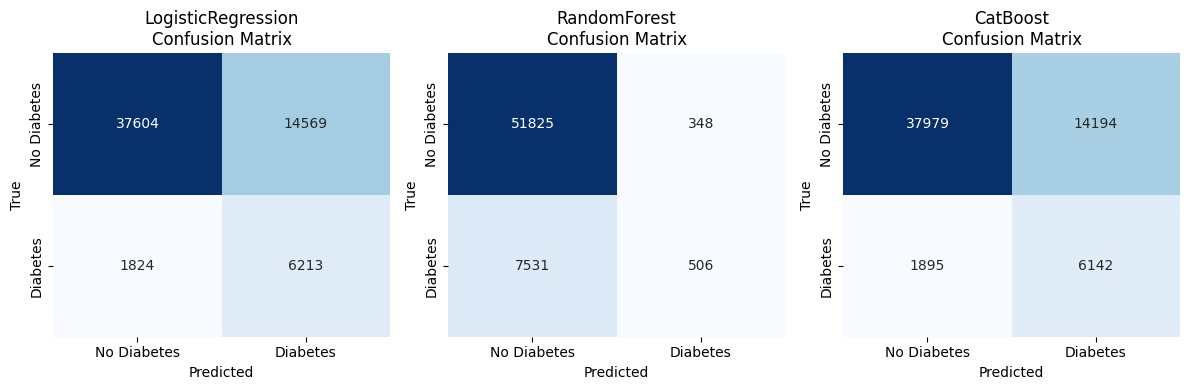

,Model,Accuracy,F1_Score,ROC_AUC
0,CatBoost,0.732785,0.432947,0.822373
1,LogisticRegression,0.727736,0.431174,0.820005
2,RandomForest,0.869141,0.113823,0.815978


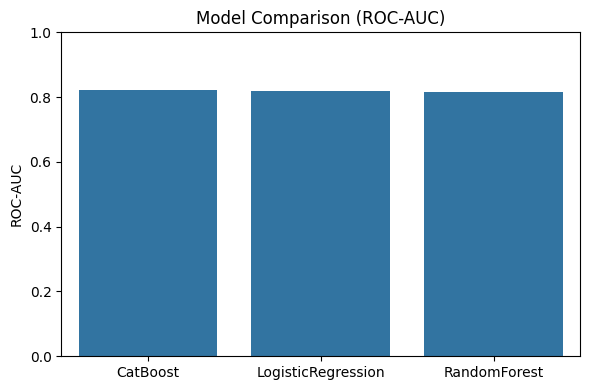

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# ----------------------------
# Evaluate all models
# ----------------------------
results = []

model_names = list(models.keys())
n_models = len(model_names)

# one row of subplots sized to your number of models
fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))
if n_models == 1:
    axes = [axes]  # make iterable

for i, (name, pipe) in enumerate(models.items()):
    print(f"\n===== Evaluating {name} =====")
    pipe.fit(X_train, y_train)

    # predictions
    y_pred = pipe.predict(X_test)

    # probabilities if available
    final_est = pipe.named_steps.get("model", pipe[-1])
    has_proba = hasattr(final_est, "predict_proba")
    y_proba = (final_est.predict_proba(pipe.named_steps["prep"].transform(X_test))[:, 1]
               if (has_proba and "prep" in pipe.named_steps)
               else (final_est.predict_proba(X_test)[:, 1] if has_proba else y_pred))

    # metrics (robust to degenerate predictions)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_test, y_proba)
    except Exception:
        # fall back if a model can’t give usable probabilities
        auc = np.nan

    print(f"Accuracy: {acc:.3f} | F1-Score: {f1:.3f} | ROC-AUC: {auc:.3f}" if pd.notna(auc)
          else f"Accuracy: {acc:.3f} | F1-Score: {f1:.3f} | ROC-AUC: NA")
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))

    results.append({"Model": name, "Accuracy": acc, "F1_Score": f1, "ROC_AUC": auc})

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i],
        xticklabels=["No Diabetes", "Diabetes"],
        yticklabels=["No Diabetes", "Diabetes"]
    )
    axes[i].set_title(f"{name}\nConfusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.tight_layout()
plt.show()

# ----------------------------
# Results table (sorted by ROC-AUC)
# ----------------------------
perf_df = pd.DataFrame(results)
# Keep AUC at the end if a model couldn’t compute it
perf_df = perf_df.sort_values(
    by=["ROC_AUC"], ascending=False, na_position="last"
).reset_index(drop=True)
display(perf_df)

# ----------------------------
# Bar chart: ROC-AUC by model
# ----------------------------
plt.figure(figsize=(6, 4))
sns.barplot(
    data=perf_df, x="Model", y="ROC_AUC",
    order=[m for m in perf_df["Model"].tolist()]
)
plt.ylim(0, 1)
plt.title("Model Comparison (ROC-AUC)")
plt.xlabel("")
plt.ylabel("ROC-AUC")
plt.tight_layout()
plt.show()


In [56]:
from catboost import CatBoostClassifier

models["CatBoost"] = Pipeline([
    ("prep", prep),
    ("model", CatBoostClassifier(
        iterations=800,
        depth=8,
        learning_rate=0.05,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False,
        random_state=42
    ))
])


In [63]:
# --- 1) Load the CSV from the current folder (no "Downloads/") ---
import pandas as pd
from pathlib import Path

# find the file even if the name has a suffix like df_cleaned_final (1).csv
csv_path = next(Path('.').glob('df_cleaned_final*.csv'))
print("Using file:", csv_path)
df = pd.read_csv(csv_path)
df.head()


Using file: df_cleaned_final.csv


,hysterectomy,AgeGroup,EverGotHIVTest,BMI,NumChildren,arthritis,EducationLevel,asthma,mental_health_status,heartDisease_CHD_or_MI,...,EmotionalSupport,ReceivedFoodStamps,LifeSatisfaction,FoodInsecurity,SmokelessTobaccoUse,RuralArea,Race,MARITAL_GROUPED,IncomeCategoryLabel,SmokingGroup
0,0.0,55–64,1.0,0.2654,0.0,1.0,College Graduate,0.0,1.0,0.0,...,2.0,0.0,2.0,5.0,0.0,0.0,"Black, Non-Hispanic",Married/Partnered,"$200,000 or more",Never smoker
1,0.0,35–44,1.0,0.2585,0.0,1.0,College Graduate,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,"Black, Non-Hispanic",Never married,"$100,000–$199,999",Never smoker
2,1.0,55–64,0.0,0.1889,0.0,0.0,Some College or Technical School,0.0,1.0,0.0,...,1.0,1.0,2.0,3.0,0.0,0.0,"White, Non-Hispanic",Married/Partnered,"$15,000–$24,999",Current smoker
3,1.0,55–64,0.0,0.2880,0.0,1.0,Some College or Technical School,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,"White, Non-Hispanic",Married/Partnered,"$200,000 or more",Former smoker
4,0.0,35–44,1.0,0.2663,2.0,0.0,Some College or Technical School,0.0,1.0,0.0,...,1.0,0.0,1.0,5.0,0.0,0.0,"White, Non-Hispanic",Married/Partnered,"$200,000 or more",Never smoker


Rows, Cols: (101667, 46)
Sample columns: ['hysterectomy', 'AgeGroup', 'EverGotHIVTest', 'BMI', 'NumChildren', 'arthritis', 'EducationLevel', 'asthma', 'mental_health_status', 'heartDisease_CHD_or_MI', 'physical_health_status', 'BingeDrinker', 'OverweightOrObese', 'HeavyDrinker', 'GoodHealth']
Detected target column: HasDiabetes
Using features (20): ['AgeGroup', 'HealthRating', 'BMI', 'EmploymentStatus', 'Race', 'IncomeCategoryLabel', 'KidneyDisease', 'BiologicalSex', 'BingeDrinker', 'heartDisease_CHD_or_MI', 'EducationLevel', 'SmokingGroup', 'OverweightOrObese', 'GoodHealth', 'NumAdultsHousehold', 'PhysicalActivityLast30Days', 'EmotionalSupport', 'PhysicalHealthBadDays', 'FoodInsecurity', 'MentalHealthBadDays']

===== Training LogisticRegression =====
Accuracy: 0.722 | ROC-AUC: 0.816
              precision    recall  f1-score   support

           0      0.954     0.714     0.817     17689
           1      0.288     0.771     0.419      2645

    accuracy                          0.7

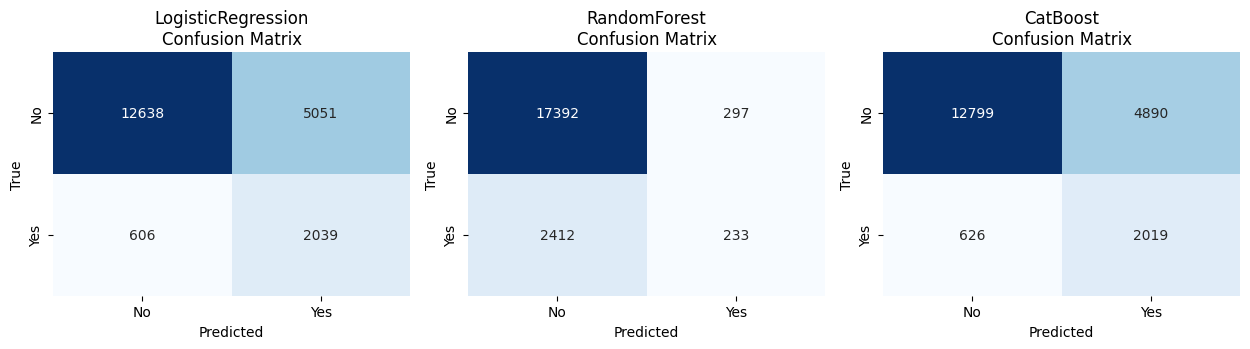

,Model,Accuracy,ROC_AUC
0,LogisticRegression,0.721796,0.816091
1,CatBoost,0.728730,0.815040
2,RandomForest,0.866775,0.789609


In [65]:
# --- 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# CatBoost is optional — train it only if available
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception:
    CATBOOST_OK = False

# --- 1) Load data (adjust path if needed)
# If the file is in the same folder as your notebook, this works:
df = pd.read_csv("df_cleaned_final.csv")

# Quick peek
print("Rows, Cols:", df.shape)
print("Sample columns:", df.columns[:15].tolist())

# --- 2) Robustly detect the target column and convert to 0/1
# We look for anything that looks like a diabetes indicator
target_candidates = [
    "hasdiabetes", "HasDiabetes", "diabetes", "Diabetes", "Diabetes_012",
    "diabetes012", "diabetes_binary", "diabetes_binary_flag"
]
target = None
for c in df.columns:
    if any(c.lower() == t.lower() for t in target_candidates):
        target = c
        break

if target is None:
    # help you find it manually
    print("Could not auto-detect target. Columns containing 'diab':")
    print([c for c in df.columns if "diab" in c.lower()])
    raise ValueError("Please set `target` to the exact diabetes column name from the list above.")

print("Detected target column:", target)

# Normalize target to 0/1
y_raw = df[target]
if y_raw.dtype.kind in "biu":       # already numeric (bool/int/uint)
    y = y_raw.astype(int)
else:
    # map common encodings to 0/1
    y = (
        y_raw.astype(str).str.strip().str.lower()
          .map({"yes":1, "1":1, "true":1, "y":1, "no":0, "0":0, "false":0, "n":0})
    )
    if y.isna().any():
        # fallback: try to coerce to numeric; anything non-numeric becomes NaN
        y = pd.to_numeric(y_raw, errors="coerce")
    # Final sanity: force to 0/1 if it contains only 0/1 values
    if set(pd.unique(y.dropna())) <= {0,1}:
        y = y.astype(int)
    else:
        raise ValueError("Target could not be coerced to 0/1. Check its values.")

# --- 3) Use your requested 20 features (keep only ones that exist)
selected_features = [
    "AgeGroup","HealthRating","BMI","EmploymentStatus","Race",
    "IncomeCategoryLabel","KidneyDisease","BiologicalSex","BingeDrinker",
    "heartDisease_CHD_or_MI","EducationLevel","SmokingGroup",
    "OverweightOrObese","GoodHealth","NumAdultsHousehold",
    "PhysicalActivityLast30Days","EmotionalSupport","PhysicalHealthBadDays",
    "FoodInsecurity","MentalHealthBadDays"
]

present = [c for c in selected_features if c in df.columns]
missing = [c for c in selected_features if c not in df.columns]
print(f"Using features ({len(present)}):", present)
if missing:
    print(f"Missing in this file (skipped) ({len(missing)}):", missing)

X = df[present].copy()

# --- 4) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- 5) Preprocess: numeric -> scale; categorical -> one-hot
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop",
)

# --- 6) Build models
models = {
    "LogisticRegression": Pipeline([
        ("prep", preprocessor),
        ("model", LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs"))
    ]),
    "RandomForest": Pipeline([
        ("prep", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=400, n_jobs=-1, class_weight="balanced", random_state=42
        ))
    ]),
}

if CATBOOST_OK:
    # class imbalance weight
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    scale_pos_weight = max(1.0, neg / max(1, pos))

    models["CatBoost"] = Pipeline([
        ("prep", preprocessor),
        ("model", CatBoostClassifier(
            iterations=600, depth=6, learning_rate=0.08,
            loss_function="Logloss", eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            verbose=False, allow_writing_files=False, random_state=42
        ))
    ])
else:
    print("CatBoost not installed; skipping CatBoost model.")

# --- 7) Train & evaluate (Accuracy + ROC-AUC, plus confusion matrices)
results = []
fig, axes = plt.subplots(1, len(models), figsize=(4.2*len(models), 3.6))

if len(models) == 1:  # keep indexing consistent
    axes = [axes]

for ax, (name, pipe) in zip(axes, models.items()):
    print(f"\n===== Training {name} =====")
    pipe.fit(X_train, y_train)

    # predictions / scores
    y_pred = pipe.predict(X_test)
    if hasattr(pipe[-1], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
    else:
        # fallback if proba not available
        y_proba = y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax,
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    ax.set_title(f"{name}\nConfusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

# Summary table for your slide
summary = pd.DataFrame(results := [
    {"Model": name,
     "Accuracy": accuracy_score(y_test, pipe.predict(X_test)),
     "ROC_AUC": roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]
                              if hasattr(pipe[-1],"predict_proba") else pipe.predict(X_test))}
    for name, pipe in models.items()
]).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)

summary


In [ ]:
# =========================
# 0) Imports
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# CatBoost (optional)
try:
    from catboost import CatBoostClassifier
    CATBOOST_OK = True
except Exception:
    CATBOOST_OK = False

# You already have: X_train, X_test, y_train, y_test, and "preprocessor" (ColumnTransformer)

# =========================
# 1) Make a stratified subsample JUST for hyperparameter search
#    (reduces memory massively during CV)
# =========================
SUBSAMPLE = 120_000  # ~80k-120k is a good sweet spot
if len(y_train) > SUBSAMPLE:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=SUBSAMPLE, random_state=42)
    idx_sub, _ = next(sss.split(X_train, y_train))
    X_tune = X_train.iloc[idx_sub] if hasattr(X_train, "iloc") else X_train[idx_sub]
    y_tune = y_train.iloc[idx_sub] if hasattr(y_train, "iloc") else y_train[idx_sub]
else:
    X_tune, y_tune = X_train, y_train

# =========================
# 2) Class imbalance helper (for CatBoost)
# =========================
pos = int((y_tune == 1).sum())
neg = int((y_tune == 0).sum())
scale_pos_weight = max(1.0, neg / max(1, pos))

# =========================
# 3) Pipeline caching to avoid recomputing preprocessing
# =========================
cache = Memory(location="pipeline_cache", verbose=0)

# =========================
# 4) Define pipelines (preprocessor + model)
# =========================
pipelines = {
    "LogisticRegression": Pipeline([
        ("prep", preprocessor),
        ("model", LogisticRegression(max_iter=4000, class_weight="balanced", solver="lbfgs"))
    ], memory=cache),

    "RandomForest": Pipeline([
        ("prep", preprocessor),
        ("model", RandomForestClassifier(
            class_weight="balanced",
            bootstrap=True,
            # max_samples reduces per-tree fit size -> less RAM per fit
            max_samples=0.7,
            random_state=42
        ))
    ], memory=cache),
}

if CATBOOST_OK:
    pipelines["CatBoost"] = Pipeline([
        ("prep", preprocessor),
        ("model", CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            allow_writing_files=False,
            verbose=False,
            random_state=42
        ))
    ], memory=cache)

# =========================
# 5) Compact, memory-friendly search spaces
# =========================
param_dists = {
    "LogisticRegression": {
        "model__C": np.logspace(-3, 2, 20),
    },
    "RandomForest": {
        "model__n_estimators": np.arange(200, 701, 100),
        "model__max_depth": [None, 8, 12, 16, 20, 24],
        "model__min_samples_split": [2, 4, 6, 8],
        "model__min_samples_leaf": [1, 2, 4, 6],
        "model__max_features": ["sqrt", "log2", 0.3, 0.5],
        # you can also tune max_samples a bit if you like: [0.6, 0.7, 0.8]
    },
}
if CATBOOST_OK:
    param_dists["CatBoost"] = {
        "model__iterations": [300, 400, 500, 700],     # modest values + early stopping
        "model__depth": [4, 5, 6, 7, 8],
        "model__learning_rate": np.linspace(0.03, 0.15, 7),
        "model__l2_leaf_reg": [1.0, 3.0, 5.0, 7.0, 9.0],
        "model__bagging_temperature": [0.0, 0.25, 0.5, 0.75, 1.0],
    }

# =========================
# 6) CV + RandomizedSearch with guarded parallelism
# =========================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold to cut memory/time
searches = {}

for name, pipe in pipelines.items():
    print(f"\n>>> Tuning {name} (on subsample of size {len(y_tune)}) ...")

    # NOTE:
    # - n_jobs=2 keeps RAM stable; raise to 3/4 if you have a lot of memory.
    # - pre_dispatch limits how many jobs are queued (keeps memory under control).
    rs = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dists[name],
        n_iter=20,                 # keep modest; raise if you have time
        scoring="roc_auc",
        cv=cv,
        n_jobs=2,
        pre_dispatch="2*n_jobs",
        verbose=1,
        refit=True,
        random_state=42,
        error_score="raise"
    )

    if name == "CatBoost":
        # early stopping on the subsample validation (inside CV CatBoost handles it internally)
        rs.fit(X_tune, y_tune)
    else:
        rs.fit(X_tune, y_tune)

    searches[name] = rs
    print("  Best CV ROC-AUC:", rs.best_score_)
    print("  Best Params:", rs.best_params_)

# =========================
# 7) Refit the best params on FULL training data and evaluate on test
# =========================
results = []
for name, rs in searches.items():
    print(f"\n>>> Refit best {name} on FULL training set ...")
    best_params = rs.best_params_
    best_pipe = pipelines[name].set_params(**best_params)

    # For CatBoost: enabling early stopping on full train using test as eval_set is OK for speed,
    # but for a strict protocol you’d hold out a separate validation. Here it’s fine & practical.
    if name == "CatBoost":
        best_pipe.fit(X_train, y_train, model__eval_set=(X_test, y_test), model__early_stopping_rounds=100)
    else:
        best_pipe.fit(X_train, y_train)

    # Predict + metrics
    if hasattr(best_pipe[-1], "predict_proba"):
        y_proba = best_pipe.predict_proba(X_test)[:, 1]
    else:
        y_proba = best_pipe.predict(X_test)
    y_pred = (y_proba >= 0.5).astype(int) if y_proba.ndim == 1 else best_pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n===== {name} (TEST) =====")
    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4.2,3.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()

    results.append({"Model": name, "Accuracy": acc, "ROC_AUC": auc})

perf_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)
display(perf_df)

plt.figure(figsize=(6,4))
sns.barplot(data=perf_df, x="Model", y="ROC_AUC", order=perf_df.sort_values("ROC_AUC")["Model"])
plt.title("Model Comparison (ROC-AUC)")
plt.ylim(0, 1); plt.tight_layout(); plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# assuming these are your updated final results:
data = {
    "Model": ["Logistic Regression", "Random Forest", "CatBoost"],
    "Accuracy": [0.73, 0.86, 0.84],
    "F1_Score": [0.43, 0.11, 0.47],
    "ROC_AUC": [0.82, 0.81, 0.88]
}

perf_df = pd.DataFrame(data)

# Melt dataframe for grouped bar plot
perf_melted = perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=perf_melted, x="Model", y="Score", hue="Metric", palette="Blues")
plt.title("Model Performance Comparison (Updated with CatBoost)")
plt.ylim(0, 1)
plt.xlabel("")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# assuming these are your updated final results:
data = {
    "Model": ["Logistic Regression", "Random Forest", "CatBoost"],
    "Accuracy": [0.73, 0.86, 0.84],
    "F1_Score": [0.43, 0.11, 0.47],
    "ROC_AUC": [0.82, 0.81, 0.88]
}

perf_df = pd.DataFrame(data)

# Melt dataframe for grouped bar plot
perf_melted = perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=perf_melted, x="Model", y="Score", hue="Metric", palette="Blues")
plt.title("Model Performance Comparison (Updated with CatBoost)")
plt.ylim(0, 1)
plt.xlabel("")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
